## LR on Iris and Wine Datasets

In [18]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import load_iris

## Load and Explore the Iris Dataset

Load the Iris dataset from sklearn.datasets and perform exploratory data analysis.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

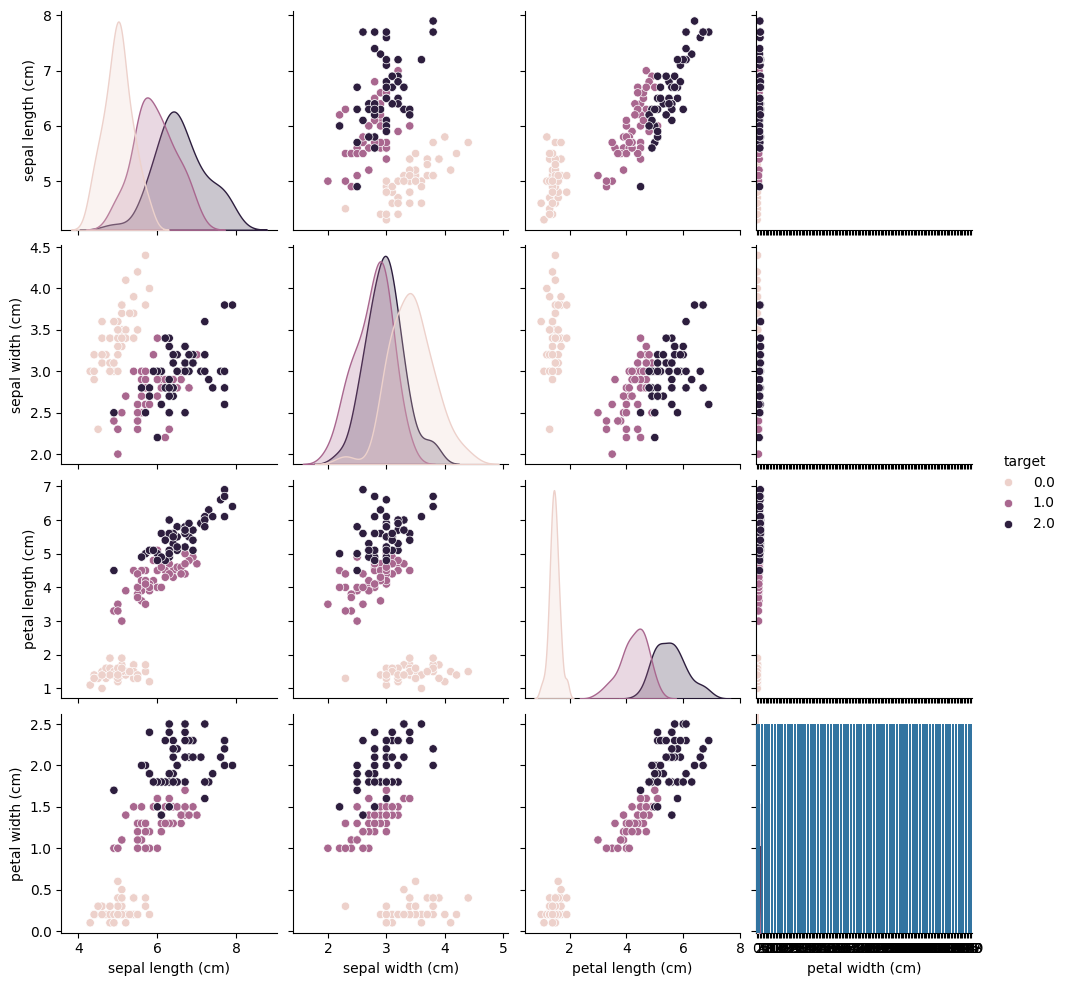

In [19]:
# Load the Iris dataset
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Display the first 5 rows of the DataFrame
print(iris_df.head())

# Display the summary statistics of the DataFrame
print(iris_df.describe())

# Display the correlation matrix of the DataFrame
print(iris_df.corr())

# Plot the pairplot of the DataFrame
sns.pairplot(iris_df, hue='target')

# Display the distribution of the target variable
sns.countplot(iris_df['target'])

# Show the plots
plt.show()

## Preprocess the Iris Dataset
Preprocess the data by splitting it into training and testing sets, and scaling the features.

In [20]:
# Importing necessary library for preprocessing
from sklearn.preprocessing import StandardScaler

# Define the features and the target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

## Apply Linear Regression to the Iris Dataset
Train a Linear Regression model on the training data and make predictions on the testing data.

In [21]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print the Mean Absolute Error of the predictions
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate and print the Mean Squared Error of the predictions
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate and print the Root Mean Squared Error of the predictions
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.14637694965308537
Mean Squared Error: 0.037113794407976894
Root Mean Squared Error: 0.19264940801356462


## Visualize the Results for the Iris Dataset
Visualize the actual vs predicted values using a scatter plot, and draw the regression line.

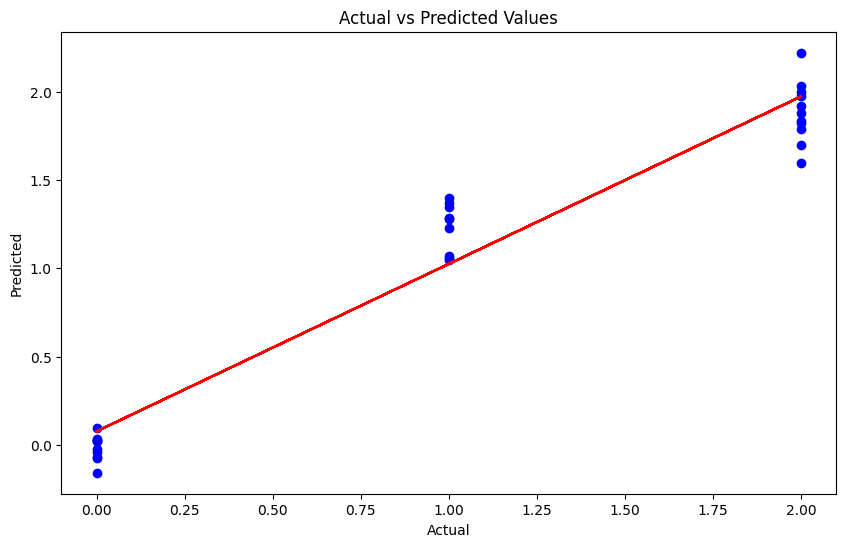

In [22]:
# Visualize the Results for the Iris Dataset
plt.figure(figsize=(10,6))

# Scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

# Regression line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Calculate Error Metrics for the Iris Dataset
Calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

In [23]:
# Calculate and print the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true - y_pred) / np.where(mask, y_true, 1))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Percentage Error: 11.736962978555447


## Load and Explore the Second Dataset

Load the second dataset and perform exploratory data analysis.

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

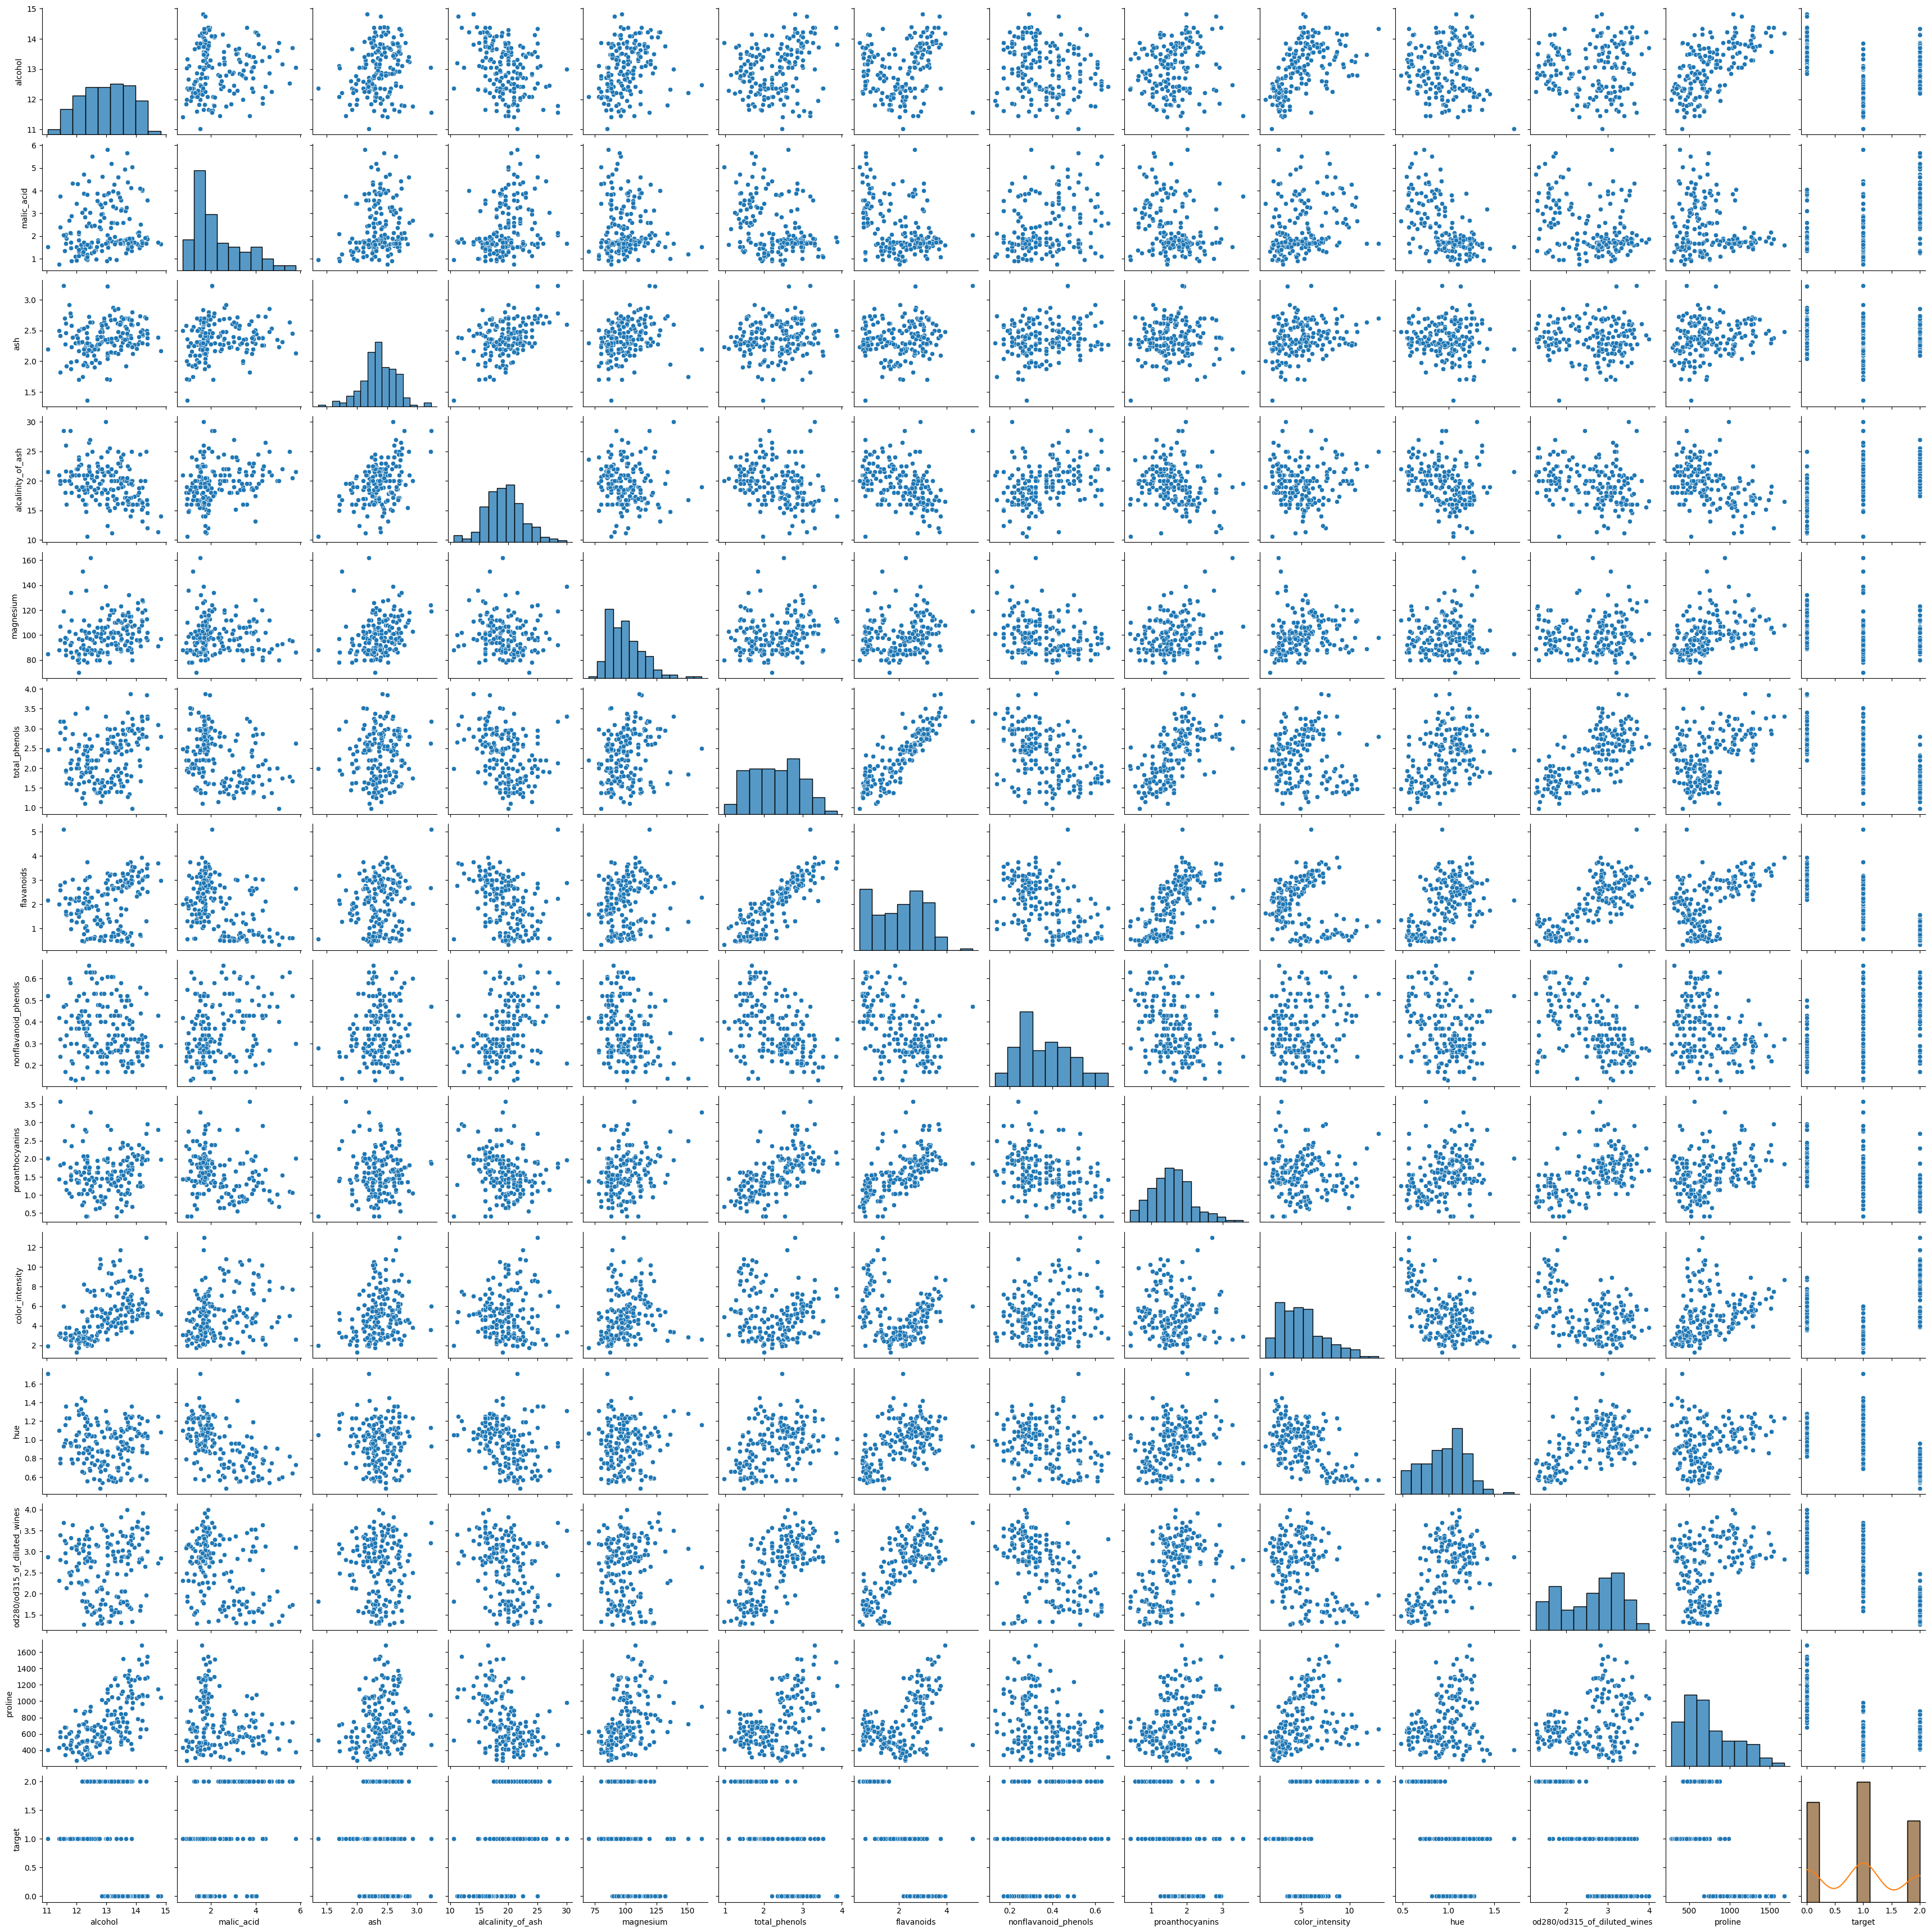

In [24]:
# The second dataset is the Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()

# Convert the dataset to a pandas DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= list(wine['feature_names']) + ['target'])

# Display the first 5 rows of the DataFrame
print(wine_df.head())

# Display the summary statistics of the DataFrame
print(wine_df.describe())

# Display the correlation matrix of the DataFrame
print(wine_df.corr())

# Plot the pairplot of the DataFrame
sns.pairplot(wine_df)

# Display the distribution of the target variable
sns.histplot(wine_df['target'], kde=True)

# Show the plots
plt.show()

## Preprocess the Second Dataset
Preprocess the data by splitting it into training and testing sets, and scaling the features.

In [25]:
# Preprocess the Wine Dataset

# Define the features and the target for the Wine dataset
X_wine = wine_df.drop('target', axis=1)
y_wine = wine_df['target']

# Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler_wine = StandardScaler()

# Fit and transform the training data
X_train_wine = scaler_wine.fit_transform(X_train_wine)

# Transform the testing data
X_test_wine = scaler_wine.transform(X_test_wine)

## Apply Linear Regression to the Wine Dataset
Train a Linear Regression model on the training data and make predictions on the testing data.

Mean Absolute Error: 0.2030472595661305
Mean Squared Error: 0.06853348464255991
Root Mean Squared Error: 0.26178900787191184


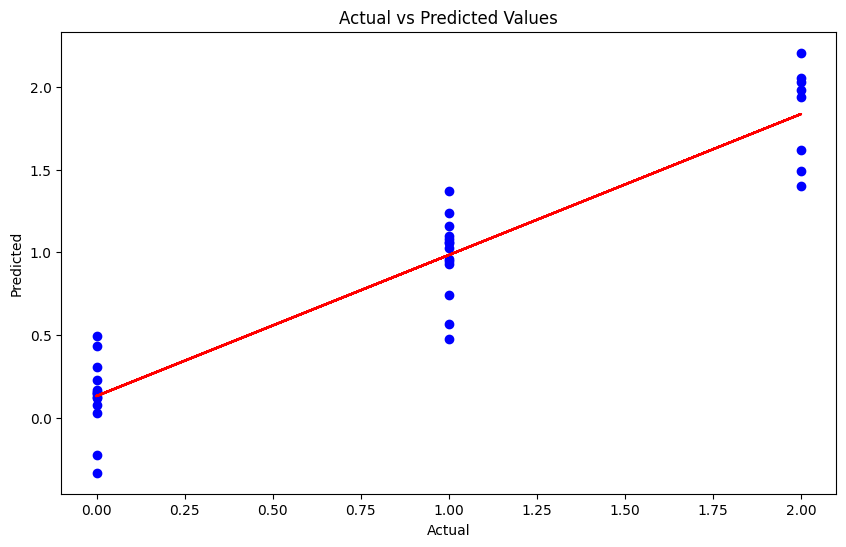

Mean Absolute Percentage Error: 17.71865690743173


In [26]:
# Initialize the Linear Regression model for the Wine dataset
model_wine = LinearRegression()

# Fit the model on the training data
model_wine.fit(X_train_wine, y_train_wine)

# Make predictions on the testing data
y_pred_wine = model_wine.predict(X_test_wine)

# Calculate and print the Mean Absolute Error of the predictions
mae_wine = metrics.mean_absolute_error(y_test_wine, y_pred_wine)
print('Mean Absolute Error:', mae_wine)

# Calculate and print the Mean Squared Error of the predictions
mse_wine = metrics.mean_squared_error(y_test_wine, y_pred_wine)
print('Mean Squared Error:', mse_wine)

# Calculate and print the Root Mean Squared Error of the predictions
rmse_wine = np.sqrt(metrics.mean_squared_error(y_test_wine, y_pred_wine))
print('Root Mean Squared Error:', rmse_wine)

# Visualize the Results for the Wine Dataset
plt.figure(figsize=(10,6))

# Scatter plot of the actual vs predicted values
plt.scatter(y_test_wine, y_pred_wine, color='blue')

# Regression line
m_wine, b_wine = np.polyfit(y_test_wine, y_pred_wine, 1)
plt.plot(y_test_wine, m_wine*y_test_wine + b_wine, color='red')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Calculate and print the Mean Absolute Percentage Error (MAPE)
mape_wine = mean_absolute_percentage_error(y_test_wine, y_pred_wine)
print('Mean Absolute Percentage Error:', mape_wine)

## Visualize the Results for the Wine Dataset
Visualize the actual vs predicted values using a scatter plot, and draw the regression line.

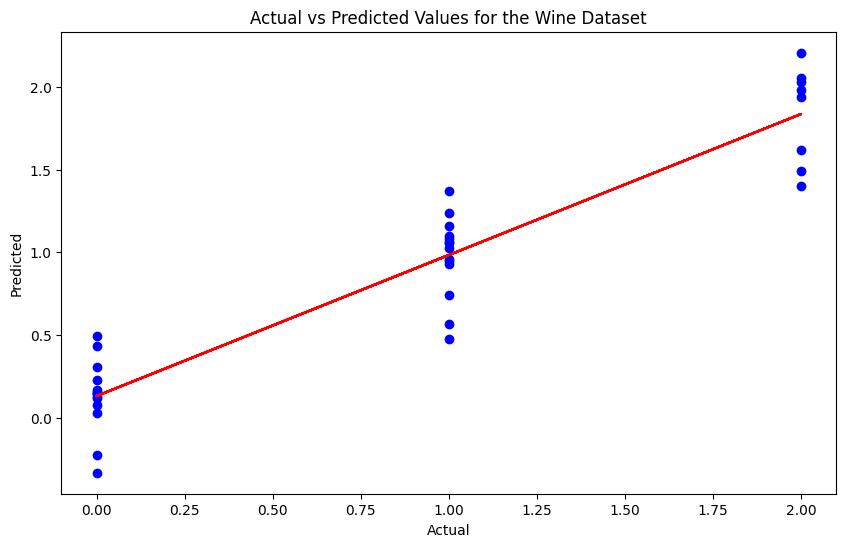

In [27]:
# Visualize the Results for the Wine Dataset
plt.figure(figsize=(10,6))

# Scatter plot of the actual vs predicted values for the Wine dataset
plt.scatter(y_test_wine, y_pred_wine, color='blue')

# Regression line for the Wine dataset
m_wine, b_wine = np.polyfit(y_test_wine, y_pred_wine, 1)
plt.plot(y_test_wine, m_wine*y_test_wine + b_wine, color='red')

plt.title('Actual vs Predicted Values for the Wine Dataset')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Calculate Error Metrics for the Wine Dataset
Calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

In [28]:
# Calculate Error Metrics for the Wine Dataset

# Calculate and print the Mean Absolute Error of the predictions for the Wine dataset
mae_wine = metrics.mean_absolute_error(y_test_wine, y_pred_wine)
print('Mean Absolute Error for the Wine Dataset:', mae_wine)

# Calculate and print the Mean Squared Error of the predictions for the Wine dataset
mse_wine = metrics.mean_squared_error(y_test_wine, y_pred_wine)
print('Mean Squared Error for the Wine Dataset:', mse_wine)

# Calculate and print the Root Mean Squared Error of the predictions for the Wine dataset
rmse_wine = np.sqrt(metrics.mean_squared_error(y_test_wine, y_pred_wine))
print('Root Mean Squared Error for the Wine Dataset:', rmse_wine)

# Calculate and print the Mean Absolute Percentage Error (MAPE) for the Wine dataset
mape_wine = mean_absolute_percentage_error(y_test_wine, y_pred_wine)
print('Mean Absolute Percentage Error for the Wine Dataset:', mape_wine)

Mean Absolute Error for the Wine Dataset: 0.2030472595661305
Mean Squared Error for the Wine Dataset: 0.06853348464255991
Root Mean Squared Error for the Wine Dataset: 0.26178900787191184
Mean Absolute Percentage Error for the Wine Dataset: 17.71865690743173
